<a href="https://colab.research.google.com/github/fabricecordelieres/IJ-Toolset_AggregatesAndMTs/blob/main/Python_Script/AggregatesAndMTs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown #Step 1: Import the required libraries
from google.colab import drive
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [ ]:
#@markdown #Step 2: Mount your Google Drive
drive.mount('/gdrive', force_remount=True)
root='/gdrive/MyDrive/'

Mounted at /gdrive


In [ ]:
#@markdown #Step 3: Select the input folder and the parameters to plot
folders=[f for f in os.listdir(root) if os.path.isdir(root+f)]
pathList=widgets.Dropdown(options=folders, value=folders[0])

params_list=['Area', 'Mean', 'StdDev', 'Mode', 'Min', 'Max', 'X', 'Y', 'Perim.', 'BX', 'BY', 'Width', 'Height', 'Major', 'Minor', 'Angle', 'Circ.', 'Feret', 'Median', 'FeretX', 'FeretY', 'FeretAngle', 'MinFeret', 'AR', 'Round', 'Solidity', 'Mean_distance_to_Cell_in_microns', 'StdDev_distance_to_Cell_in_microns', 'Mode_distance_to_Cell_in_microns', 'Min_distance_to_Cell_in_microns', 'Max_distance_to_Cell_in_microns', 'Median_distance_to_Cell_in_microns', 'Mean_distance_to_MTs_in_microns', 'StdDev_distance_to_MTs_in_microns', 'Mode_distance_to_MTs_in_microns', 'Min_distance_to_MTs_in_microns', 'Max_distance_to_MTs_in_microns', 'Median_distance_to_MTs_in_microns', 'Mean_distance_to_Nuclei_in_microns', 'StdDev_distance_to_Nuclei_in_microns', 'Mode_distance_to_Nuclei_in_microns', 'Min_distance_to_Nuclei_in_microns', 'Max_distance_to_Nuclei_in_microns', 'Median_distance_to_Nuclei_in_microns']
xList=widgets.Dropdown(options=params_list, value=params_list[35])
yList=widgets.Dropdown(options=params_list, value=params_list[0])

print('Where are the files ?')
display(pathList)
print('Parameter to be plotted in x')
display(xList)
print('Parameter to be plotted in y')
display(yList)

Where are the files ?


Dropdown(options=('Perso', 'Boulot', '2021 IRHC Tentative 5', 'Colab Notebooks', 'test_NN', 'Test data Jerome'…

Parameter to be plotted in x


Dropdown(index=35, options=('Area', 'Mean', 'StdDev', 'Mode', 'Min', 'Max', 'X', 'Y', 'Perim.', 'BX', 'BY', 'W…

Parameter to be plotted in y


Dropdown(options=('Area', 'Mean', 'StdDev', 'Mode', 'Min', 'Max', 'X', 'Y', 'Perim.', 'BX', 'BY', 'Width', 'He…

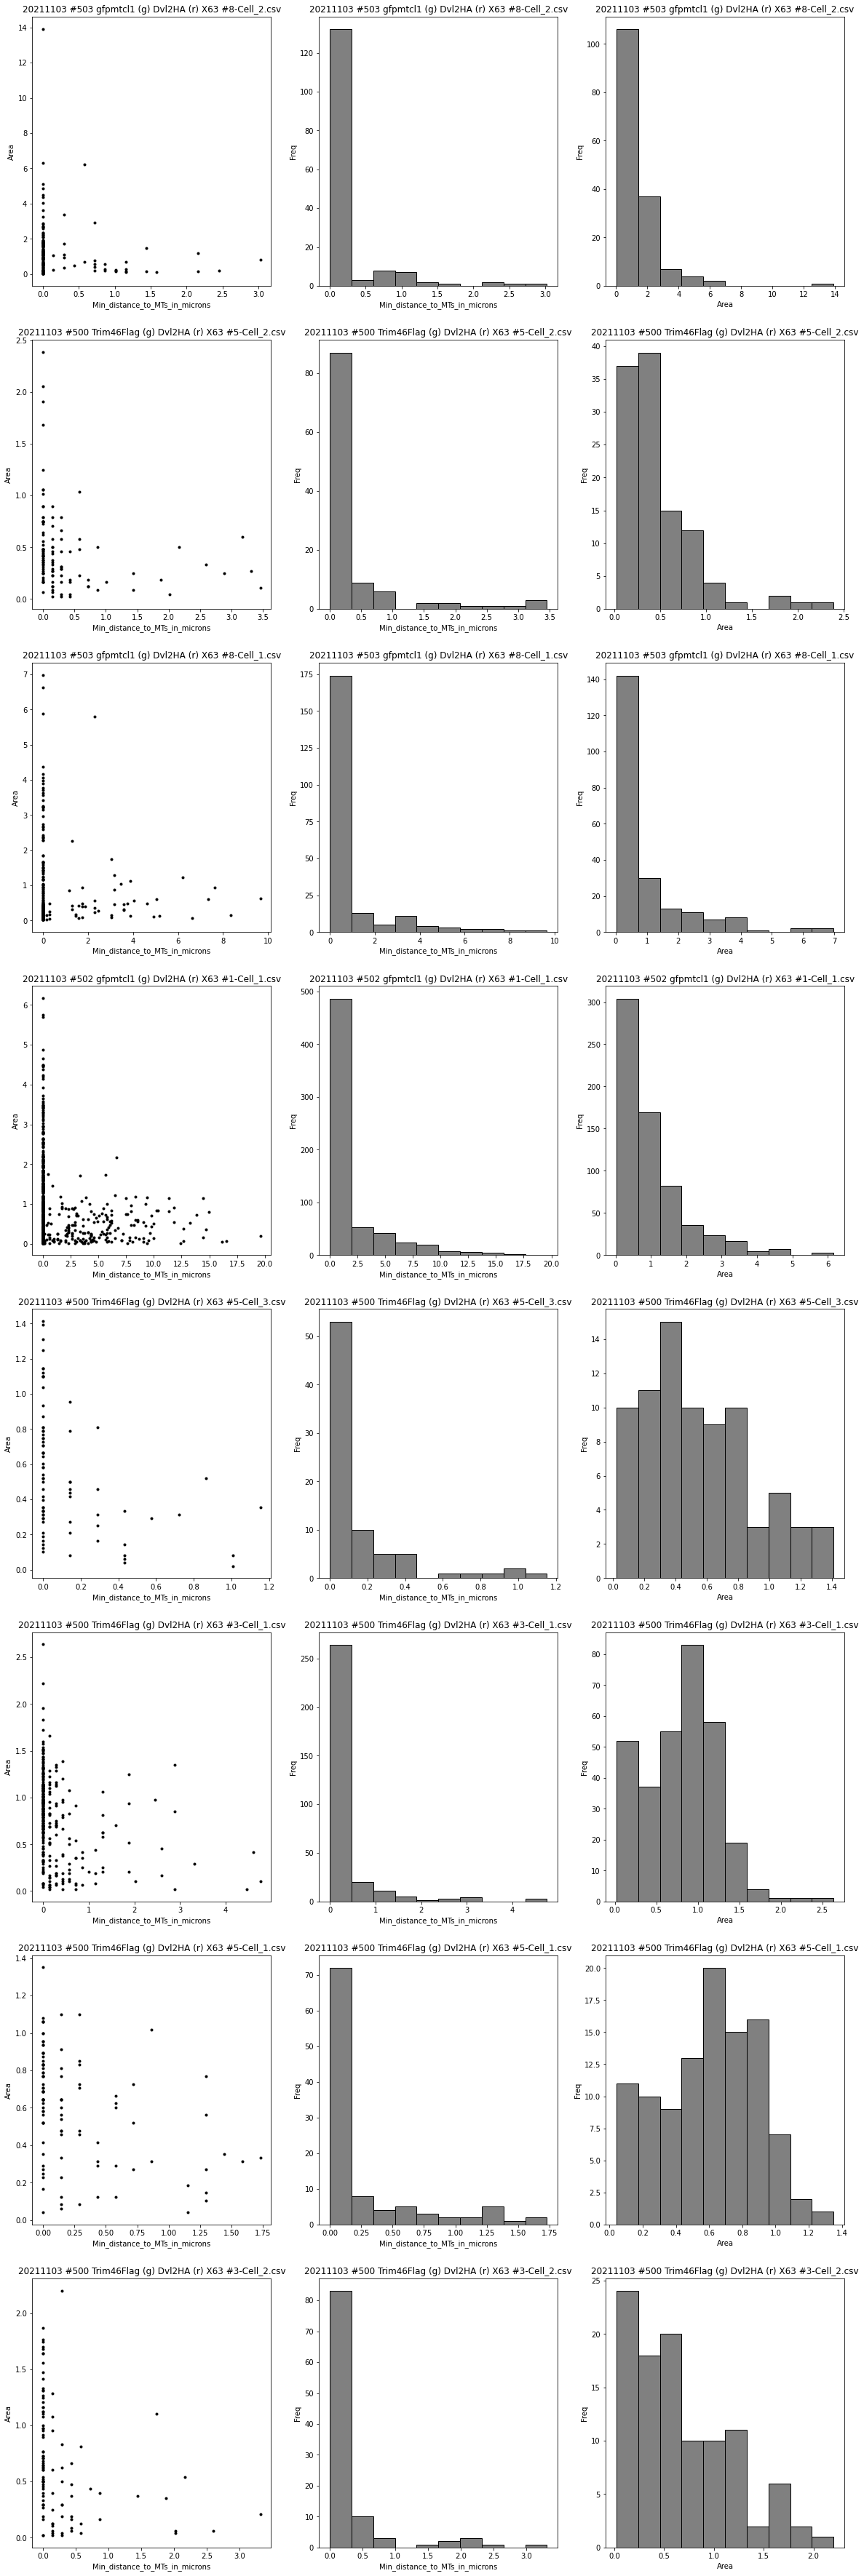

In [ ]:
#@markdown #Step 4: Plot correlations and distributions
x=xList.value
y=yList.value
path=root+pathList.value+os.sep

files=[f for f in os.listdir(path) if f.endswith('.csv')]

plt.rcParams["figure.figsize"] = (20, 8*len(files))
fig, axs = plt.subplots(len(files), 3)
index=0

for f in files:
  data_ori=pd.read_csv(path+f)
  
  axs[index, 0].scatter(data_ori[x], data_ori[y], color='black', marker='.')
  axs[index, 0].set_xlabel(x)
  axs[index, 0].set_ylabel(y)
  axs[index, 0].set_title(f)

  axs[index, 1].hist(data_ori[x], color = 'grey', edgecolor = 'black', bins = 10)
  axs[index, 1].set_xlabel(x)
  axs[index, 1].set_ylabel("Freq")
  axs[index, 1].set_title(f)
  
  axs[index, 2].hist(data_ori[y], color = 'grey', edgecolor = 'black', bins = 10)
  axs[index, 2].set_xlabel(y)
  axs[index, 2].set_ylabel("Freq")
  axs[index, 2].set_title(f)

  index=index+1

In [ ]:
#@markdown #Step 5: Select a file to plot a correlogram
fileList=widgets.Dropdown(options=files, value=files[0])

print('Which file to plot ?')
display(fileList)

Which file to plot ?


Dropdown(options=('20211103 #503 gfpmtcl1 (g) Dvl2HA (r) X63 #8-Cell_2.csv', '20211103 #500 Trim46Flag (g) Dvl…

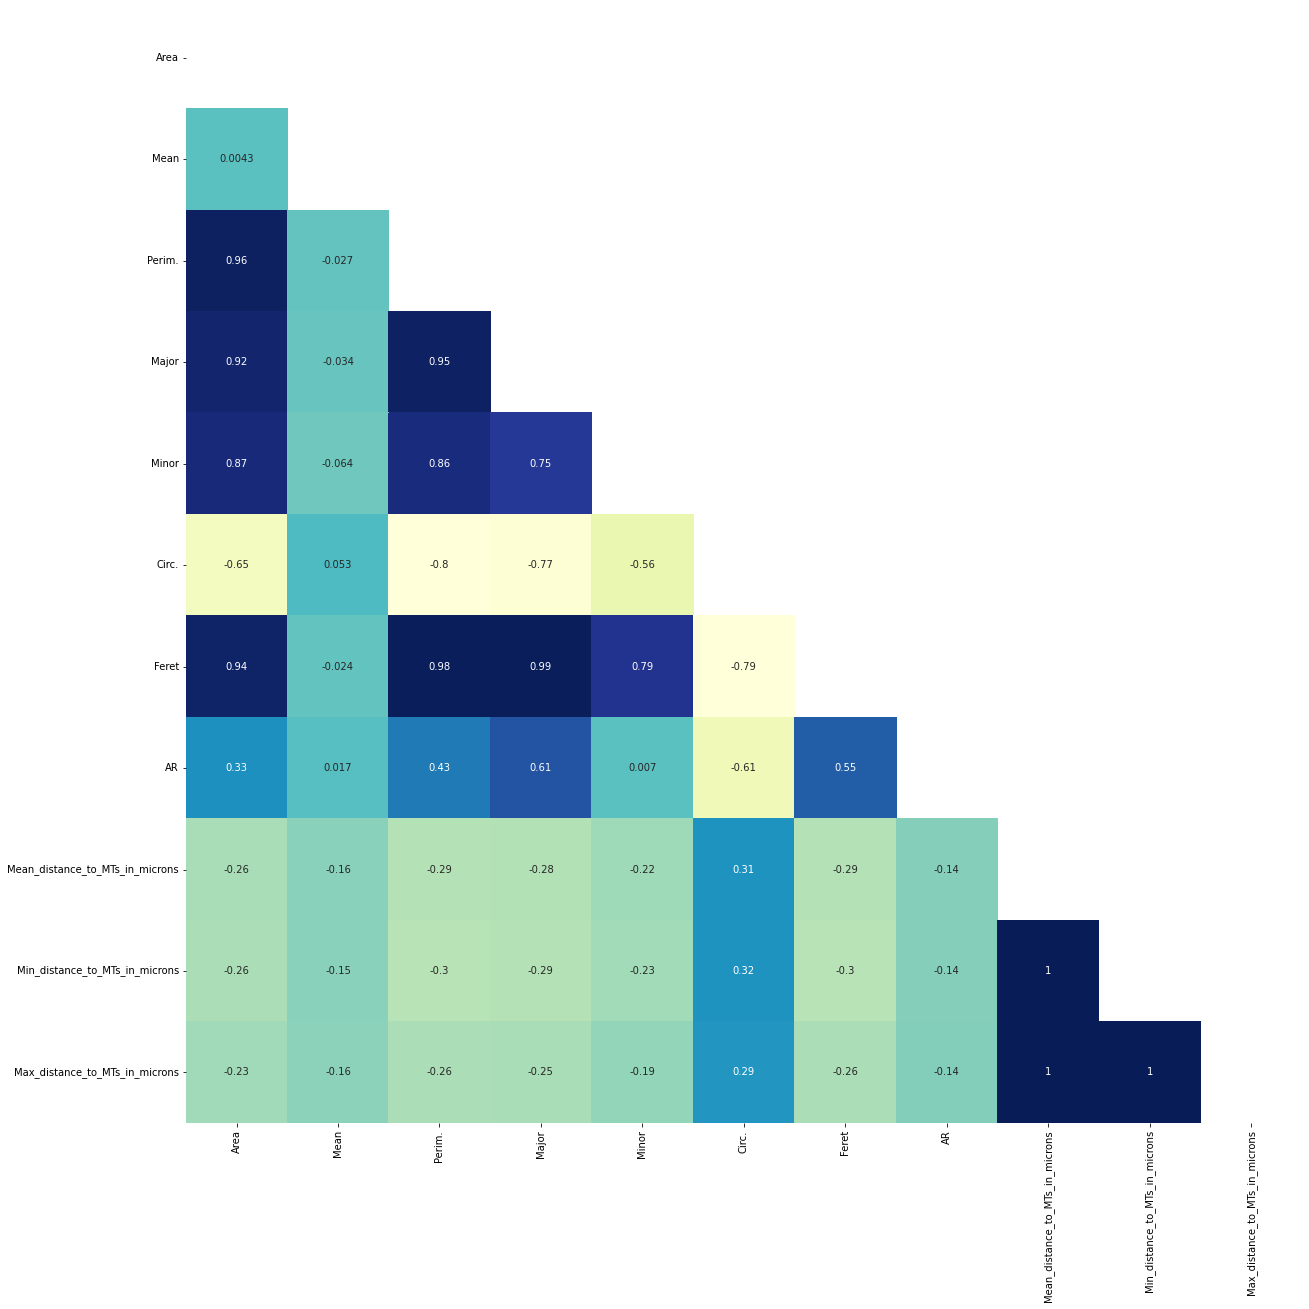

In [ ]:
#@markdown #Step 6: Plot the correlogram

data=pd.read_csv(path+fileList.value)
'''
items=['Area',
 'Mean',
 'Perim.',
 'Major',
 'Minor',
 'Circ.',
 'Feret',
 'AR',
 'Mean_distance_to_Cell_in_microns',
 'Min_distance_to_Cell_in_microns',
 'Max_distance_to_Cell_in_microns',
 'Mean_distance_to_MTs_in_microns',
 'Min_distance_to_MTs_in_microns',
 'Max_distance_to_MTs_in_microns',
 'Mean_distance_to_Nuclei_in_microns',
 'Min_distance_to_Nuclei_in_microns',
 'Max_distance_to_Nuclei_in_microns']
'''
items=['Area',
 'Mean',
 'Perim.',
 'Major',
 'Minor',
 'Circ.',
 'Feret',
 'AR',
 'Mean_distance_to_MTs_in_microns',
 'Min_distance_to_MTs_in_microns',
 'Max_distance_to_MTs_in_microns']


#select somme data
data_filtered={}
for item in items:
  data_filtered[item]=data[item]


data_filtered=pd.DataFrame(data_filtered)

Var_Corr = data_filtered.corr()

# Create a ask no to have double data+autocorr at 1
mask = np.zeros_like(Var_Corr)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, square=True, cbar=False, cmap="YlGnBu", mask=mask)
ticks=plt.yticks(rotation=0) 